Hierarchical clustering is an alternative to the $k$-means method, which doesn't require us to specify the number of clusters. It allows us to visualize and generate the interpretation of the results by using dendrograms (binary hierarchical clustering, which splits clusters into 2 at each hierarchy level).

There are 2 main approaches: __aggolmerative__, which starts by treating each single datapoint as a cluster and then building up to a single cluster in hierarchies, and __divisive__ which starts off with the entire dataset as a single cluster, and then proceeds to go down the tree, splitting at each hierarchic "node".

We will use this notebook to explore the agglomerative method.

In agglomerative clustering, there are two standard algorithms - single linkage and complete linkage.

- With single linkage, the distances between the most similar (closest distance) members of two clusters are computed, and then the two clusters whose distance between the most similar members is minimal are merged. That is, merge $C$, $C'$ if $$(C, C') = \argmin_{C_1, C_2} \min_{x \in C_1, y \in C_2} d(x,y)$$

- Complete linkage is very similar, but the intercluster distance considered is between the most dissimlar (farthest) members of two clusters. That is merge $C$, $C'$ if $$(C, C') = \argmin_{C_1, C_2} \max_{x \in C_1, y \in C_2} d(x,y)$$

There are other types of linkages considered, such as average linkage (which replaces the min or max intercluster distance with the average intercluster distance), and Ward's linkage (which instead optimizes over inertia/within cluster SSE, merging based on the pair of clusters that cause it to increase minimally.)

The algorithm for the hierarchichal agglomerative clustering (with the consideration of L linkage, where L can be single, complete, average or Ward's).

1) Compute a pair-wise distance matrix of all examples/data points.
2) Represent each datapoint as a singleton cluster.
3) Merge the two closest clusters based on the L linkage criterion.
4) Update the cluster linkage matrix.
5) Repeat 2-4 until only one cluster remains.

In [8]:
# Let's create our own dataset example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
print(df)

             X         Y         Z
ID_0  3.745401  9.507143  7.319939
ID_1  5.986585  1.560186  1.559945
ID_2  0.580836  8.661761  6.011150
ID_3  7.080726  0.205845  9.699099
ID_4  8.324426  2.123391  1.818250


In [9]:
# Compute the pair-wise distance matrix
from scipy.spatial.distance import pdist, squareform
# pdist returns the upper triangular matrix representing the pairwise distances between rows as an array
# squareform is more for our visualization - creates a symmetric matrix out of it

pair_dists = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
print(row_dist)
print(pair_dists)

           ID_0       ID_1       ID_2       ID_3       ID_4
ID_0   0.000000  10.067500   3.527332  10.163608  10.283767
ID_1  10.067500   0.000000   9.973350   8.323293   2.418558
ID_2   3.527332   9.973350   0.000000  11.285037  10.967857
ID_3  10.163608   8.323293  11.285037   0.000000   8.205581
ID_4  10.283767   2.418558  10.967857   8.205581   0.000000
[10.06750007  3.52733207 10.16360836 10.28376658  9.97335012  8.32329273
  2.41855823 11.28503669 10.9678572   8.20558061]


In [10]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df.values, method='complete', metric='euclidean')

print(pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'dist', 'num examples in cluster'], index=[f'cluster {(i + 1)}' for i in range(row_clusters.shape[0])]))

           row label 1  row label 2       dist  num examples in cluster
cluster 1          1.0          4.0   2.418558                      2.0
cluster 2          0.0          2.0   3.527332                      2.0
cluster 3          3.0          5.0   8.323293                      3.0
cluster 4          6.0          7.0  11.285037                      5.0


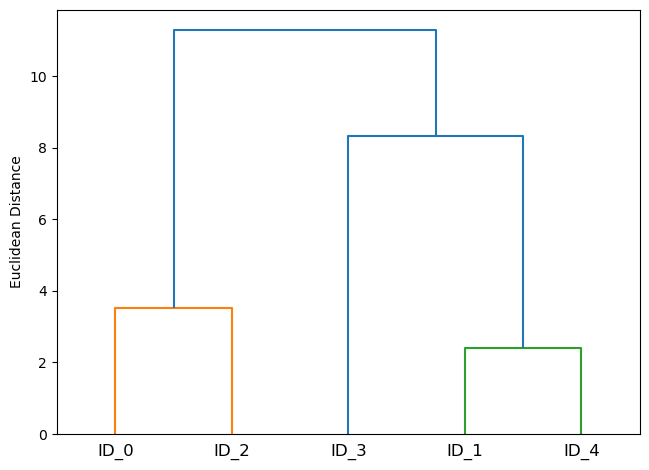

In [11]:
from scipy.cluster.hierarchy import dendrogram

row_dendro = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

C:\Users\sadit\AppData\Local\Temp\ipykernel_12052\3849823388.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axh.set_xticklabels([''] + list(df_rowclustered.columns))
C:\Users\sadit\AppData\Local\Temp\ipykernel_12052\3849823388.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axh.set_yticklabels([''] + list(df_rowclustered.index))


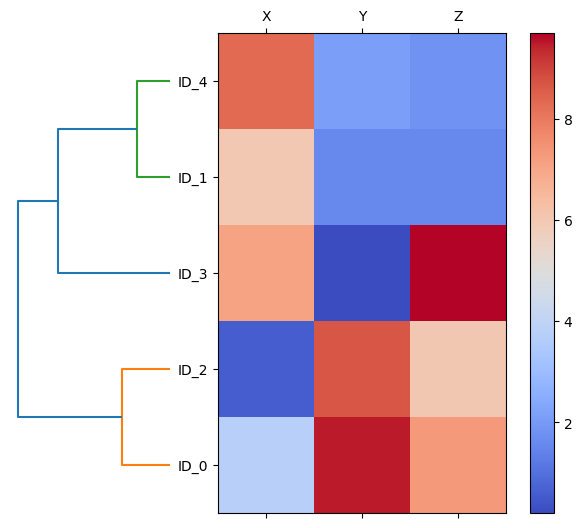

In [13]:
# Dendrograms can also be attached to a heatmap, which is commonplace in practical applications

# Create the denrogram image
fig = plt.figure(figsize=(8, 8), facecolor='white')
# Define the x_axis and y_axis positions, and the width and height
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
# Rotate the dendrogram 
row_dendro = dendrogram(row_clusters, orientation='left')


# Reorder the original dataframe according to the dendogram ordering (accessible from dendrogram leaves object)
df_rowclustered = df.iloc[row_dendro['leaves'][::-1]]

# Create heatmap from the reorderd dataframe
axh = fig.add_axes([0.23, 0.1, 0.6, 0.6])
clr_ax = axh.matshow(df_rowclustered, interpolation='nearest', cmap='coolwarm')

# Remove dendrogram plot ticks
axd.set_xticks([])
axd.set_yticks([])

# Hide axis spines
for i in axd.spines.values():
    i.set_visible(False)

# Set colorbar
fig.colorbar(clr_ax)

# Set heatmap x labels from the feature labels of datapoint
axh.set_xticklabels([''] + list(df_rowclustered.columns))
# Use the Row ID to set y_ticks
axh.set_yticklabels([''] + list(df_rowclustered.index))

plt.show()

In [19]:
# There is a scikit learn implementation of Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')

labels = ac.fit_predict(X)
print(f"Labels: {list(zip(df.index, labels))}")

Labels: [('ID_0', np.int64(0)), ('ID_1', np.int64(1)), ('ID_2', np.int64(0)), ('ID_3', np.int64(2)), ('ID_4', np.int64(1))]


In [20]:
# This clearly matches the dendrogram above. (1, 4), (0, 2), (3)
# If we chop it down to 2 clusters, we expect (3) to be merged into (1, 3, 4) based on the dendrogram hierarchy

ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')

labels = ac.fit_predict(X)
print(f"Labels: {list(zip(df.index, labels))}")

Labels: [('ID_0', np.int64(1)), ('ID_1', np.int64(0)), ('ID_2', np.int64(1)), ('ID_3', np.int64(0)), ('ID_4', np.int64(0))]
